Actividad semanal 7 : Regresiones

Alumno: Enrique Ricardo García Hernández - A01315428

Profesor: María de la Paz Rico Fernández

Fecha: Nov 11 2022

**Ejercicio 1**

In [ ]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/marypazrf/bdd/main/EconomiesOfScale.csv')
df.sample(5)

,Number of Units,Manufacturing Cost
668,5.045997,44.361087
957,6.865924,27.901113
575,4.688092,48.512880
809,5.572949,38.258057
22,1.802089,52.964408


In [ ]:
X = df[['Number of Units']]
y = df['Manufacturing Cost']

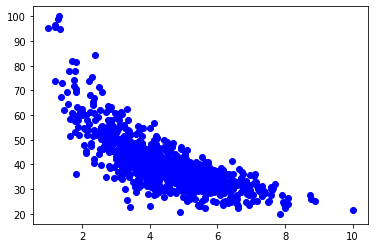

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.scatter(X,y,color='b')
plt.show()

In [ ]:
from scipy.stats import pearsonr
corr_test = pearsonr(X['Number of Units'], y)
print("Coeficiente de correlación de Pearson: ", corr_test[0])

Coeficiente de correlación de Pearson:  -0.7609052213322163


In [ ]:
def DistributionPlot(RedFunction, BlueFunction, RedName, BlueName, Title):
  ax1 = sns.distplot(RedFunction, hist=False, color="r", label=RedName)
  ax2 = sns.distplot(BlueFunction, hist=False, color="b", label=BlueName, ax=ax1)

  plt.title(Title)
  plt.xlabel('Number of Units')
  plt.ylabel('Manufacturing Cost')

  plt.show()
  plt.close()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.25,random_state=42)
print("El número de observaciones de train es",X_train.shape[0])
print("El número de observaciones de test es",X_test.shape[0])

El número de observaciones de train es 750
El número de observaciones de test es 250


In [ ]:
lr=LinearRegression()
lr.fit(X_train,y_train)
yhat_test=lr.predict(X_test)

In [ ]:
#Calculamos la R^2 en la base de entrenamiento
lr.score(X_train,y_train)

0.5774246104936722

In [ ]:
#Calculamos la R^2 en la base de prueba
lr.score(X_test,y_test)

0.5819496152192392

In [ ]:
# Información del modelo
# ==============================================================================
print("Intercept:", lr.intercept_)
print("Coeficiente:", list(zip(X.columns, lr.coef_.flatten(), )))
print("Coeficiente de determinación R^2:", lr.score(X, y))
print("Error Absoluto Medio:", mean_absolute_error(y, lr.predict(X)))

Intercept: 67.88519414416737
Coeficiente: [('Number of Units', -6.225079031715803)]
Coeficiente de determinación R^2: 0.5783910439608906
Error Absoluto Medio: 4.945481778582789


Ecuación del modelo de la regresión lineal:

$\hat{y} = -6.22X + 67.88$

In [ ]:
#Calculamos los valores estimados
yhat=lr.predict(X)

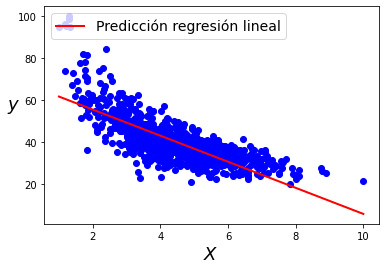

In [ ]:
plt.scatter(X,y,color='b')
plt.plot(X,yhat,color='r', linewidth=2, label="Predicción regresión lineal")
plt.xlabel("$X$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14);

In [ ]:
#Regresión Polinomial
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
#Calcularemos una regresión de grado 2
pr=PolynomialFeatures(degree=2)
X_train_pr=pr.fit_transform(X_train)
X_test_pr=pr.fit_transform(X_test)

In [ ]:
poly=LinearRegression()
poly.fit(X_train_pr,y_train)

LinearRegression()

In [ ]:
#Calculamos la R^2 en la base de entrenamiento
poly.score(X_train_pr,y_train)

0.6728638632419662

In [ ]:
#Calculamos la R^2 en la base de test
poly.score(X_test_pr,y_test)

0.6314972370482955

In [ ]:
X_pr=pr.fit_transform(X)

In [ ]:
yhat2=poly.predict(X_pr)

In [ ]:
# Información del modelo Polinomial con grado=2, dado que la distribución de los puntos tiene "cara de parábola"
# ==============================================================================
print("Intercept:", poly.intercept_)
print("Coeficientes:", poly.coef_)
print("Coeficiente de determinación R^2:", poly.score(X_pr, y))
print("Error Absoluto Medio:", mean_absolute_error(y, poly.predict(X_pr)))

Intercept: 92.33914437184882
Coeficiente: [  0.         -17.88592504   1.27304105]
Coeficiente de determinación R^2: 0.6640657282040865
Error Absoluto Medio: 4.573088125500513


Ecuación de la regresión poinómica (grado=2):

$\hat{y} = -17.88X + 1.27X^2 + 92.88$

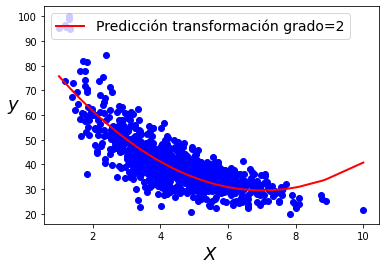

In [ ]:
plt.scatter(X,y,color='b')
plt.plot(X,yhat2,color='r', linewidth=2, label="Predicción transformación grado=2")
plt.xlabel("$X$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14);

In [ ]:
#Regresión Ridge
from sklearn.linear_model import Ridge

In [ ]:
RigeModel=Ridge(alpha=1)
RigeModel.fit(X_train_pr,y_train)

Ridge(alpha=1)

In [ ]:
#Haremos Grid search para encontrar el alpha que minimiza el error
from sklearn.model_selection import GridSearchCV
parametro=[{'alpha':[.001,.01,.1,1,10,100,1000,10000,100000]}]
parametro

[{'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000]}]

In [ ]:
RR=Ridge()
Grid1=GridSearchCV(RR,parametro,cv=4)

In [ ]:
#Ajustamos el modelo
Grid1.fit(X_train_pr,y_train)

GridSearchCV(cv=4, estimator=Ridge(),
             param_grid=[{'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000,
                                    100000]}])

In [ ]:
BestRR=Grid1.best_estimator_
BestRR

Ridge(alpha=1)

In [ ]:
#El mejor modelo es con alpha=1

In [ ]:
# Información del modelo Ridge
# ==============================================================================
print("Intercept:", BestRR.intercept_)
print("Coeficientes:", BestRR.coef_)
print("Coeficiente de determinación R^2:", BestRR.score(X_pr, y))
print("Error Absoluto Medio:", mean_absolute_error(y, BestRR.predict(X_pr)))

Intercept: 91.67966406009296
Coeficientes: [  0.         -17.58656657   1.24181886]
Coeficiente de determinación R^2: 0.6644481873795106
Error Absoluto Medio: 4.563886651649249


Ecuación de la regresión Ridge (alpha=1):

$\hat{y} = -17.58X + 1.24X^2 + 91.68$

In [ ]:
yRidge=BestRR.predict(X_pr)

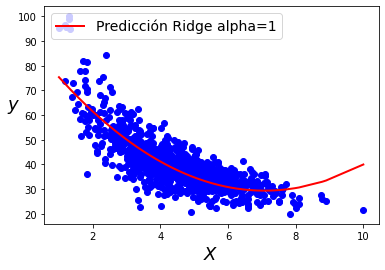

In [ ]:
plt.scatter(X,y,color='b')
plt.plot(X,yRidge,color='r', linewidth=2, label="Predicción Ridge alpha=1")
plt.xlabel("$X$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14);

In [ ]:
#Regresión Lasso
from sklearn.linear_model import Lasso

In [ ]:
LassoModel=Lasso(alpha=1)
LassoModel.fit(X_train_pr,y_train)

Lasso(alpha=1)

In [ ]:
LL=Lasso()
Grid2=GridSearchCV(LL,parametro,cv=4)

In [ ]:
#Ajustamos el modelo
Grid2.fit(X_train_pr,y_train)

GridSearchCV(cv=4, estimator=Lasso(),
             param_grid=[{'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000,
                                    100000]}])

In [ ]:
BestLL=Grid2.best_estimator_
BestLL

Lasso(alpha=0.1)

In [ ]:
#El mejor modelo Lasso tiene alpha=0.1

In [ ]:
LassoModel=Lasso(alpha=0.1)
LassoModel.fit(X_train_pr,y_train)

Lasso(alpha=0.1)

In [ ]:
# Información del modelo Lasso
# ==============================================================================
print("Intercept:", BestLL.intercept_)
print("Coeficientes:", BestLL.coef_)
print("Coeficiente de determinación R^2:", BestLL.score(X_pr, y))
print("Error Absoluto Medio:", mean_absolute_error(y, BestLL.predict(X_pr)))

Intercept: 89.2091955425266
Coeficientes: [  0.         -16.45925216   1.12364562]
Coeficiente de determinación R^2: 0.6647329081182405
Error Absoluto Medio: 4.537316436395513


Ecuación de la regresión Lasso (alpha=0.1):

$\hat{y} = -16.45X + 1.12X^2 + 89.20$

In [ ]:
yLasso=BestLL.predict(X_pr)

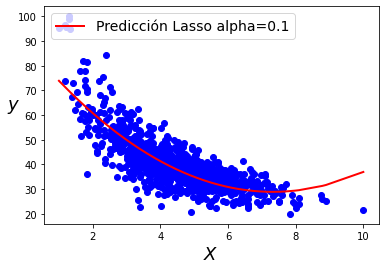

In [ ]:
plt.scatter(X,y,color='b')
plt.plot(X,yLasso,color='r', linewidth=2, label="Predicción Lasso alpha=0.1")
plt.xlabel("$X$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14);

In [ ]:
#MAE de los 4 modelos
from sklearn.metrics import mean_absolute_error
print("Regresion Lineal, Error Absoluto Medio:", mean_absolute_error(y, lr.predict(X)))
print("Regresion Polynomial grado=2, Error Absoluto Medio:", mean_absolute_error(y, poly.predict(X_pr)))
print("Regularización Ridge (alpha=1), Error Absoluto Medio:", mean_absolute_error(y, BestRR.predict(X_pr)))
print("Regularización Lasso (alpha=0.1), Error Absoluto Medio:", mean_absolute_error(y, BestLL.predict(X_pr)))


Regresion Lineal, Error Absoluto Medio: 4.945481778582789
Regresion Polynomial grado=2, Error Absoluto Medio: 4.573088125500513
Regularización Ridge (alpha=1), Error Absoluto Medio: 4.563886651649249
Regularización Lasso (alpha=0.1), Error Absoluto Medio: 4.537316436395513


In [ ]:
#R^2 de los 4 modelos
print("R^2 regresión lineal:", lr.score(X,y))
print("R^2 Regresion Polynomial grado=2:", poly.score(X_pr,y))
print("R^2 Regularización Ridge (alpha=1)", BestRR.score(X_pr,y))
print("R^2 Regularización Lasso (alpha=0.1)", BestLL.score(X_pr, y))

R^2 regresión lineal: 0.5783910439608906
R^2 Regresion Polynomial grado=2: 0.6640657282040865
R^2 Regularización Ridge (alpha=1) 0.6644481873795106
R^2 Regularización Lasso (alpha=0.1) 0.6647329081182405


Se utilizó una partición 75% entrenamiento y 25% prueba.

Se ve una mejora en el desempeño de pasar de un modelo lineal (coeficiente de R^2=057) a cualquier modelo grado=2 (R^2 al menos del 0.66).

El análisis visual muestra una parábola que una ecuación de 2do grado predice de mejor forma.

Al realizar las regularizaciones de Lasso y Rigde y buscar minimizar el Error Cuadrático con el análisis iteractivo de las alpha, no se aprecian mejoras significativas en la predictibilidad y Error Absoluto.

El **mejor modelo es Lasso (alpha=0.1)** con R^2 de 66.47% y Error absoluto = 4.537

**Ejercicio 2**

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/marypazrf/bdd/main/kc_house_data.csv')
df.sample(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
19499,2856101105,20140527T000000,488000.0,3,2.50,1590,2550,3.0,0,0,...,7,1590,0,1985,0,98117,47.6772,-122.393,1260,5100
6186,6705850020,20150401T000000,740000.0,4,2.50,3030,8335,2.0,0,0,...,10,3030,0,1992,0,98075,47.5780,-122.056,2850,8678
6615,421000430,20150331T000000,225000.0,3,1.00,960,5512,1.0,0,0,...,6,960,0,1963,0,98056,47.4944,-122.165,1090,5837
9278,8129700644,20150424T000000,780000.0,3,4.00,2080,2250,3.0,0,4,...,8,2080,0,1997,0,98103,47.6598,-122.355,2080,2250
4398,3821000100,20150320T000000,249950.0,4,1.75,1620,10530,1.0,0,0,...,7,1620,0,1968,0,98030,47.3808,-122.211,1890,9975
9531,1137450120,20140729T000000,487500.0,4,2.50,2810,6296,2.0,0,0,...,9,2810,0,2013,0,98059,47.5019,-122.151,2850,6140
11072,9432900560,20150212T000000,290000.0,3,2.50,2360,8764,2.0,0,0,...,8,2360,0,1991,0,98022,47.2114,-122.009,2360,8746
11087,3701000060,20141216T000000,880000.0,3,1.75,3860,9000,1.0,0,2,...,9,1930,1930,1970,0,98155,47.7431,-122.290,2960,9000
13639,7853302110,20150406T000000,469900.0,3,2.50,2270,4399,2.0,0,0,...,7,2270,0,2007,0,98065,47.5415,-121.884,2060,4399
17251,6806300980,20141223T000000,490000.0,4,2.50,3630,8387,2.0,0,0,...,10,3630,0,1997,0,98042,47.3623,-122.127,3370,8869


In [ ]:
df.drop('id', axis = 1, inplace = True)
df.drop('date', axis = 1, inplace = True)
df.drop('zipcode', axis = 1, inplace = True)
df.drop('lat', axis = 1, inplace = True)
df.drop('long', axis = 1, inplace = True)
df.head(5)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,1800,7503


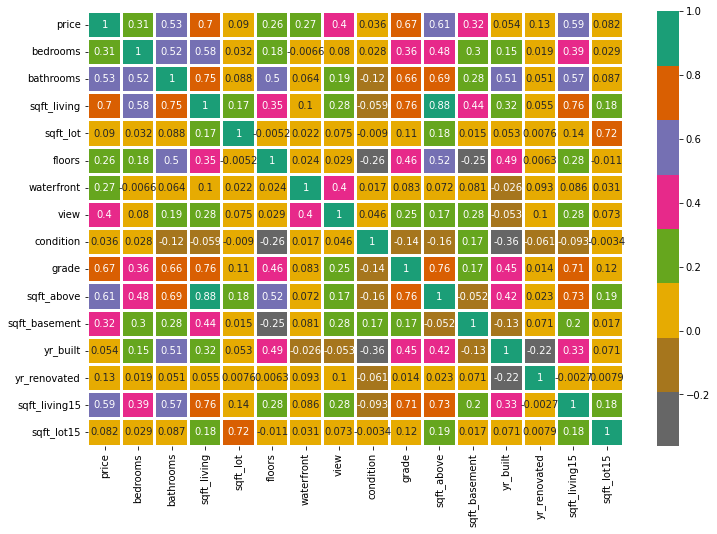

In [ ]:
plt.figure(figsize=(12,8)) 
sns.heatmap(df.corr(), annot=True, cmap='Dark2_r', linewidths = 2)
plt.show()

In [ ]:
columns = df.columns.drop('price')

features = columns
label = ['price']

X = df[features]
y = df[label]

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 101)

print(f'Numero total de registros en la bdd: {len(X)}')
print("*****"*10)
print(f'Numero total de registros en el training set: {len(X_train)}')
print(f'Tamaño de X_train: {X_train.shape}')
print("*****"*10)
print(f'Mumero total de registros en el test dataset: {len(X_test)}')
print(f'Tamaño del X_test: {X_test.shape}')

Numero total de registros en la bdd: 21613
**************************************************
Numero total de registros en el training set: 19451
Tamaño de X_train: (19451, 15)
**************************************************
Mumero total de registros en el test dataset: 2162
Tamaño del X_test: (2162, 15)


In [ ]:
#Regresión Lineal Múltiple
lrm=LinearRegression()
lrm.fit(X_train,y_train)

LinearRegression()

In [ ]:
lrm.predict(X_test)
print("R^2 de la regresión lineal aplicada a la base test",lrm.score(X_test,y_test))

R^2 de la regresión lineal aplicada a la base test 0.6579723205007814


In [ ]:
yhat=lrm.predict(X)

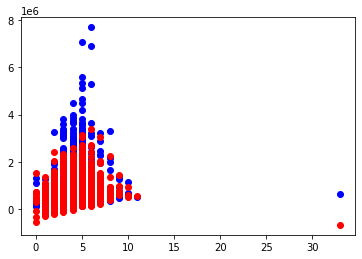

In [ ]:
plt.scatter(x=X['bedrooms'],y=y['price'],c='b')
plt.scatter(x=X['bedrooms'],y=yhat,c='r')
plt.show()
#Parece que el modelo subestima el precio de la vivienda de acuerdo al número de cuartos

In [ ]:
# Información del modelo
# ==============================================================================
print("Intercept:", lrm.intercept_)
print("Coeficiente:", list(zip(X.columns, lrm.coef_.flatten(), )))
print("Coeficiente de determinación R^2:", lrm.score(X, y))
print("Error Absoluto Medio:", mean_absolute_error(y, lrm.predict(X)))

Intercept: [6151359.2627409]
Coeficiente: [('bedrooms', -38200.80483396449), ('bathrooms', 41466.13802863147), ('sqft_living', 107.99258400093822), ('sqft_lot', 0.0171356997161638), ('floors', 31691.691313553605), ('waterfront', 552691.0233181857), ('view', 41249.32275203692), ('condition', 21222.144256109055), ('grade', 119493.21585367358), ('sqft_above', 47.77502707057647), ('sqft_basement', 60.21755653483342), ('yr_built', -3550.9021573131968), ('yr_renovated', 13.260221498272529), ('sqft_living15', 29.00592838751345), ('sqft_lot15', -0.5481326027838804)]
Coeficiente de determinación R^2: 0.6535308525095571
Error Absoluto Medio: 139090.35238662068


In [ ]:
#Regresión Múltiple Polinomial
#Calcularemos una regresión de grado 2
pr=PolynomialFeatures(degree=2)
X_train_pr=pr.fit_transform(X_train)
X_test_pr=pr.fit_transform(X_test)
X_pr=pr.fit_transform(X)

In [ ]:
polym=LinearRegression()
polym.fit(X_train_pr,y_train)

LinearRegression()

In [ ]:
# Información del modelo de regresión polinomial múltiple
# ==============================================================================
print("Intercept:", polym.intercept_)
print("Coeficiente:", polym.coef_)
print("Coeficiente de determinación R^2:", polym.score(X_pr, y))
print("Error Absoluto Medio:", mean_absolute_error(y, polym.predict(X_pr)))

Intercept: [80233537.22738773]
Coeficiente: [[-3.36215067e+02  9.33786601e+05 -1.09276012e+06 -5.00000916e+02
  -2.78655818e+01 -2.07431876e+06 -3.95454208e+06 -2.88626046e+05
   5.58593032e+05  1.09860635e+06 -1.76306376e+02 -3.38830099e+02
  -8.59690742e+04 -2.95364696e+03  3.99966813e+03 -3.40100969e+01
   9.57353093e+02  7.49573773e+03 -1.43129923e+01 -1.86055609e-02
   8.57765264e+03 -1.15023978e+04 -3.07568695e+02 -5.24425041e+03
  -5.36756662e+03 -6.90375101e-01 -1.40883136e+01 -4.67027049e+02
  -9.12671559e+00  1.72774587e+01  2.15692510e-01 -9.63018996e+03
   1.55434606e+01 -1.35758634e-01 -2.59069352e+04  4.33710369e+04
   3.82965496e+03 -1.07945148e+03  2.22974058e+04  1.42714685e+01
   1.18111267e+00  5.03113646e+02 -1.70855006e+01 -1.72874822e+01
  -5.57330742e-02 -4.95300818e-01 -1.18373560e+00  4.83455018e+00
   1.60300634e+02 -1.42701954e+01  1.31157574e+01  2.07362736e+01
  -3.88265256e+00  1.77534910e+00  3.44718628e+00  2.90907898e-02
  -2.87308877e+00 -1.69344406e+0

In [ ]:
#Regularización Ridge SIN transformación
from sklearn.linear_model import Ridge

In [ ]:
#Haremos Grid search para encontrar el alpha que minimiza el error
from sklearn.model_selection import GridSearchCV
parametro=[{'alpha':[.001,.01,.1,1,10,100,1000,10000,100000]}]
parametro

[{'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000]}]

In [ ]:
RRm=Ridge()
Grid1m=GridSearchCV(RRm,parametro,cv=4)

In [ ]:
#Generamos el modelo
Grid1m.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=2.48085e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=2.7763e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=2.92767e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=2.6277e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


GridSearchCV(cv=4, estimator=Ridge(),
             param_grid=[{'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000,
                                    100000]}])

In [ ]:
BestRRm=Grid1m.best_estimator_
BestRRm

Ridge(alpha=0.1)

In [ ]:
#El mejor modelo regresión lineal múltiple con Regularización RR y alpha=0.1

In [ ]:
# Información del modelo Ridge
# ==============================================================================
print("Intercept:", BestRRm.intercept_)
print("Coeficiente:", list(zip(X.columns, BestRRm.coef_.flatten(), )))
print("Coeficiente de determinación R^2:", BestRRm.score(X, y))
print("Error Absoluto Medio:", mean_absolute_error(y, BestRRm.predict(X)))

Intercept: [6151298.16840607]
Coeficiente: [('bedrooms', -38202.66242974447), ('bathrooms', 41464.61538411782), ('sqft_living', 107.99541861566733), ('sqft_lot', 0.01711516092125284), ('floors', 31691.438931456712), ('waterfront', 552244.5134002309), ('view', 41270.13764843623), ('condition', 21222.578802048705), ('grade', 119490.9427447676), ('sqft_above', 47.777525108181), ('sqft_basement', 60.21575952380699), ('yr_built', -3550.8618755101807), ('yr_renovated', 13.265957829598195), ('sqft_living15', 29.0038359769631), ('sqft_lot15', -0.5481190731312516)]
Coeficiente de determinación R^2: 0.6535297445798194
Error Absoluto Medio: 139090.45357511536


In [ ]:
#Modelo de regresió lineal múltiple con regularización Lasso
LassoModelm=Lasso(alpha=0.1)
LassoModelm.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.053e+14, tolerance: 2.572e+11
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


Lasso(alpha=0.1)

In [ ]:
LLm=Lasso()
Grid2m=GridSearchCV(LLm,parametro,cv=4)
Grid2m.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.109e+14, tolerance: 1.941e+11
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.984e+14, tolerance: 1.936e+11
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisa

GridSearchCV(cv=4, estimator=Lasso(),
             param_grid=[{'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000,
                                    100000]}])

In [ ]:
BestLLm=Grid2m.best_estimator_
BestLLm

Lasso(alpha=1)

In [ ]:
#El mejor modelo Lasso tiene alpha=1
LassoModelm=Lasso(alpha=1)
LassoModelm.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.053e+14, tolerance: 2.572e+11
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


Lasso(alpha=1)

In [ ]:
# Información de la regresión lineal múltiple con regularización Lasso y alpha=1
# ==============================================================================
print("Intercept:", BestLLm.intercept_)
print("Coeficiente:", list(zip(X.columns, BestLLm.coef_.flatten(), )))
print("Coeficiente de determinación R^2:", BestLLm.score(X, y))
print("Error Absoluto Medio:", mean_absolute_error(y, BestLLm.predict(X)))

Intercept: [6151280.11390041]
Coeficiente: [('bedrooms', -38199.53451424516), ('bathrooms', 41461.85678094857), ('sqft_living', 293.4804819511947), ('sqft_lot', 0.017128182190217413), ('floors', 31687.141114431288), ('waterfront', 552541.1077939414), ('view', 41254.96540382799), ('condition', 21219.39019678531), ('grade', 119491.83728774815), ('sqft_above', -137.70820000812037), ('sqft_basement', -125.26844920374003), ('yr_built', -3550.85005106388), ('yr_renovated', 13.262845971808112), ('sqft_living15', 29.005329784755936), ('sqft_lot15', -0.5481360746255574)]
Coeficiente de determinación R^2: 0.6535304517619404
Error Absoluto Medio: 139090.4100648079


In [ ]:
#MAE de los 4 modelos de la regresión lineal múltiple
from sklearn.metrics import mean_absolute_error
print("Regresion Lineal múltiple, Error Absoluto Medio:", mean_absolute_error(y, lrm.predict(X)))
print("Regresion Polynomial grado=2, Error Absoluto Medio:", mean_absolute_error(y, polym.predict(X_pr)))
print("Regularización Ridge (alpha=0.1), Error Absoluto Medio:", mean_absolute_error(y, BestRRm.predict(X)))
print("Regularización Lasso (alpha=1), Error Absoluto Medio:", mean_absolute_error(y, BestLLm.predict(X)))

Regresion Lineal múltiple, Error Absoluto Medio: 139090.35238662068
Regresion Polynomial grado=2, Error Absoluto Medio: 123003.22040645295
Regularización Ridge (alpha=0.1), Error Absoluto Medio: 139090.45357511536
Regularización Lasso (alpha=1), Error Absoluto Medio: 139090.4100648079


In [ ]:
#R^2 de los 4 modelos
print("R^2 regresión lineal múltiple:", lrm.score(X,y))
print("R^2 Regresion Polynomial grado=2:", polym.score(X_pr,y))
print("R^2 Regularización Ridge (alpha=0.1)", BestRRm.score(X,y))
print("R^2 Regularización Lasso (alpha=1)", BestLLm.score(X, y))

R^2 regresión lineal múltiple: 0.6535308525095571
R^2 Regresion Polynomial grado=2: 0.7508065249978767
R^2 Regularización Ridge (alpha=0.1) 0.6535297445798194
R^2 Regularización Lasso (alpha=1) 0.6535304517619404


EL 90% de la base de datos se utilizó para entrenamiento y el 10% restante para validación.

La regresión polinomial múltple con grado=2, explica el 75% del fenómeno

Para este ejercicio el **mejor modelo resultó ser la regresión polinomial múltiple con grado=2**.

Presenta el menor nivel de error medio absoluto además de la mayor R^2.

